In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

json = "https://gist.githubusercontent.com/nadirbslmh/93b62fdcfa694d4ec07bed9b3c94e401/raw/c07971341361e23fd4f3a880437c4d8e4ebcfafc/stock_trades.json"
data = pd.read_json(json)
df = pd.DataFrame(data)
df

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency
0,1,GOOGL,1/5/2017,3,675.51,501030,1,1,sell,EUR
1,2,NVDA,3/27/2017,13,559.39,51823,2,2,buy,ZAR
2,3,NFLX,11/7/2015,0,811.33,684430,3,3,sell,ZWL
3,4,MSFT,5/29/2017,22,231.21,237465,4,4,buy,IDR
4,5,JPM,11/8/2012,16,699.15,800344,5,5,buy,HRK
...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208.69,54629,996,996,buy,CNY
996,997,GOOGL,9/24/2018,9,829.10,365834,997,997,sell,RUB
997,998,MSFT,5/2/2012,16,346.35,891372,998,998,sell,EUR
998,999,NVDA,10/9/2010,0,935.36,483631,999,999,sell,PKR


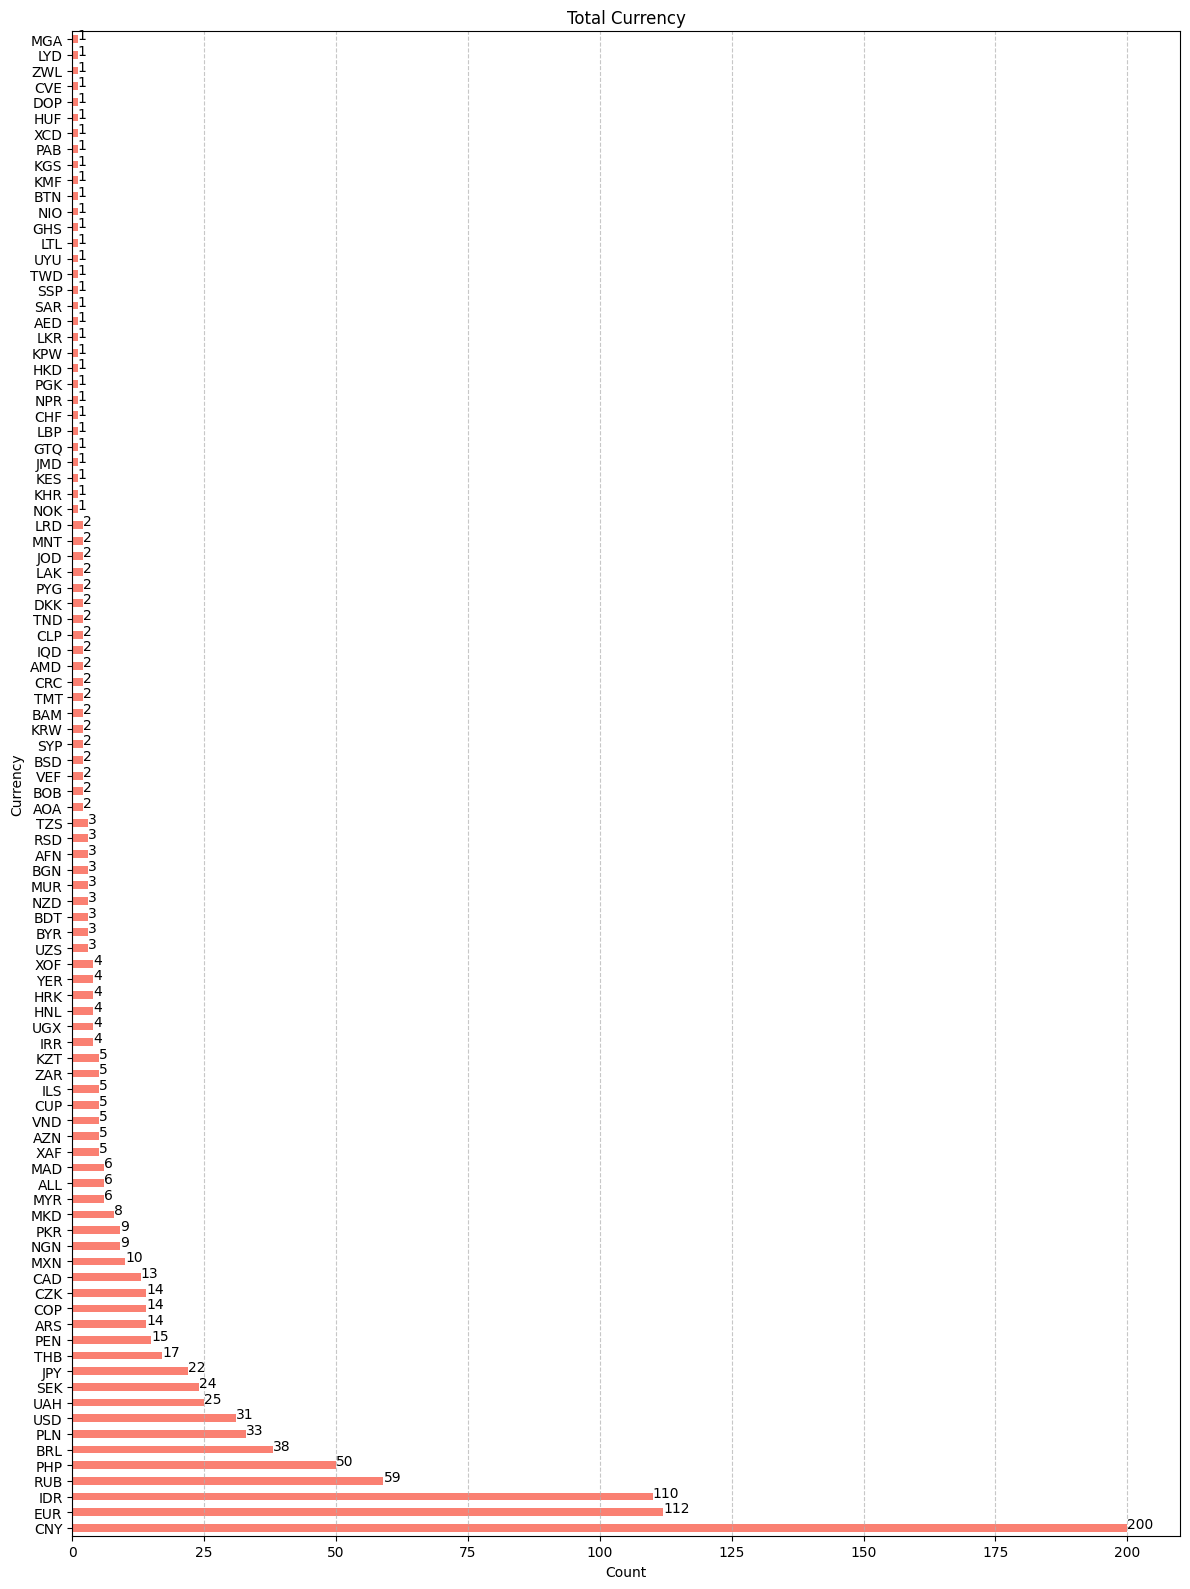

Currency yang tersedia:
['CNY', 'EUR', 'IDR', 'RUB', 'PHP', 'BRL', 'PLN', 'USD', 'UAH', 'SEK', 'JPY', 'THB', 'PEN', 'ARS', 'COP', 'CZK', 'CAD', 'MXN', 'NGN', 'PKR', 'MKD', 'MYR', 'ALL', 'MAD', 'XAF', 'AZN', 'VND', 'CUP', 'ILS', 'ZAR', 'KZT', 'IRR', 'UGX', 'HNL', 'HRK', 'YER', 'XOF', 'UZS', 'BYR', 'BDT', 'NZD', 'MUR', 'BGN', 'AFN', 'RSD', 'TZS', 'AOA', 'BOB', 'VEF', 'BSD', 'SYP', 'KRW', 'BAM', 'TMT', 'CRC', 'AMD', 'IQD', 'CLP', 'TND', 'DKK', 'PYG', 'LAK', 'JOD', 'MNT', 'LRD', 'NOK', 'KHR', 'KES', 'JMD', 'GTQ', 'LBP', 'CHF', 'NPR', 'PGK', 'HKD', 'KPW', 'LKR', 'AED', 'SAR', 'SSP', 'TWD', 'UYU', 'LTL', 'GHS', 'NIO', 'BTN', 'KMF', 'KGS', 'PAB', 'XCD', 'HUF', 'DOP', 'CVE', 'ZWL', 'LYD', 'MGA']


In [4]:
currency_counts = df['currency'].value_counts()

# Membuat visualisasi
plt.figure(figsize=(12, 16))

# Menggunakan horizontal bar plot
currency_counts.plot(kind='barh', color='salmon')

plt.title('Total Currency')
plt.xlabel('Count')
plt.ylabel('Currency')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid pada sumbu x

# Menambahkan keterangan nilai pada setiap bar
for index, value in enumerate(currency_counts):
    plt.text(value, index, str(value))

plt.tight_layout()

# Menampilkan visualisasi
plt.show()

# Print currency yang tersedia
print("Currency yang tersedia:")
print(currency_counts.index.tolist())

In [6]:
# Nilai tukar mata uang terhadap IDR
exchange_rates_to_idr = {
    'CNY': 1964.68,
    'EUR': 17269.95,
    'IDR': 1,
    'RUB': 180.36,
    'PHP': 316.61,
    'BRL': 2620.87,
    'PLN': 4128.67,
    'USD': 14231.00,
    'UAH': 506.56,
    'SEK': 1619.51,
    'JPY': 129.42,
    'THB': 449.85,
    'PEN': 3786.73,
    'ARS': 146.87,
    'COP': 3.88,
    'CZK': 631.03,
    'CAD': 11192.41,
    'MXN': 704.26,
    'NGN': 35.00,
    'PKR': 88.22,
    'MKD': 274.75,
    'MYR': 3487.84,
    'ALL': 140.48,
    'MAD': 1592.17,
    'XAF': 25.66,
    'AZN': 8376.83,
    'VND': 0.62,
    'CUP': 337.61,
    'ILS': 4351.39,
    'ZAR': 960.60,
    'KZT': 33.67,
    'IRR': 0.34,
    'UGX': 3.98,
    'HNL': 571.49,
    'HRK': 2270.54,
    'YER': 56.93,
    'XOF': 25.66,
    'UZS': 1.35,
    'BYR': 5.66,
    'BDT': 167.81,
    'NZD': 9775.88,
    'MUR': 356.36,
    'BGN': 8198.60,
    'AFN': 179.12,
    'RSD': 141.68,
    'TZS': 6.17,
    'AOA': 32.80,
    'BOB': 2059.89,
    'VEF': 0.0016,
    'BSD': 14232.23,
    'SYP': 28.16,
    'KRW': 12.62,
    'BAM': 8547.21,
    'TMT': 4058.24,
    'CRC': 22.60,
    'AMD': 28.02,
    'IQD': 9.70,
    'CLP': 17.91,
    'TND': 5021.48,
    'DKK': 2245.47,
    'PYG': 2.01,
    'LAK': 1.52,
    'JOD': 20112.27,
    'MNT': 0.005,
    'LRD': 70.42,
    'NOK': 1661.21,
    'KHR': 3.51,
    'KES': 127.82,
    'JMD': 94.73,
    'GTQ': 1841.10,
    'LBP': 9.42,
    'CHF': 15530.25,
    'NPR': 121.26,
    'PGK': 4018.34,
    'HKD': 1828.20,
    'KPW': 12.79,
    'LKR': 71.53,
    'AED': 3878.97,
    'SAR': 3795.39,
    'SSP': 35.27,
    'TWD': 505.14,
    'UYU': 330.45,
    'LTL': 4252.82,
    'GHS': 2421.76,
    'NIO': 406.28,
    'BTN': 196.31,
    'KMF': 34.74,
    'KGS': 167.84,
    'PAB': 14232.23,
    'XCD': 5267.42,
    'HUF': 47.79,
    'DOP': 259.23,
    'CVE': 147.80,
    'ZWL': 34.42,
    'LYD': 3192.81,
    'MGA': 3.75
}

# Konversi nilai transaksi ke int
df['trade_price'] = df['trade_price'].astype(int)

# Konversi nilai transaksi ke IDR
df['trade_price_idr'] = [
    row['trade_price'] * exchange_rates_to_idr.get(row['currency']) if row['currency'] != 'IDR' and exchange_rates_to_idr.get(row['currency']) else None 
    for _, row in df.iterrows()
]

# Ubah mata uang transaksi menjadi "IDR"
df['currency'] = df['currency'].apply(lambda x: 'IDR' if x != 'IDR' and exchange_rates_to_idr.get(x) else x)
df

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency,trade_price_idr
0,1,GOOGL,1/5/2017,3,675,501030,1,1,sell,IDR,11657216.25
1,2,NVDA,3/27/2017,13,559,51823,2,2,buy,IDR,536975.40
2,3,NFLX,11/7/2015,0,811,684430,3,3,sell,IDR,27914.62
3,4,MSFT,5/29/2017,22,231,237465,4,4,buy,IDR,NaN
4,5,JPM,11/8/2012,16,699,800344,5,5,buy,IDR,1587107.46
...,...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208,54629,996,996,buy,IDR,408653.44
996,997,GOOGL,9/24/2018,9,829,365834,997,997,sell,IDR,149518.44
997,998,MSFT,5/2/2012,16,346,891372,998,998,sell,IDR,5975402.70
998,999,NVDA,10/9/2010,0,935,483631,999,999,sell,IDR,82485.70


In [8]:
df = df.dropna()
df

,trade_id,stock_symbol,trade_date,trade_time,trade_price,trade_volume,buyer_id,seller_id,trade_type,currency,trade_price_idr
0,1,GOOGL,1/5/2017,3,675,501030,1,1,sell,IDR,11657216.25
1,2,NVDA,3/27/2017,13,559,51823,2,2,buy,IDR,536975.40
2,3,NFLX,11/7/2015,0,811,684430,3,3,sell,IDR,27914.62
4,5,JPM,11/8/2012,16,699,800344,5,5,buy,IDR,1587107.46
5,6,AAPL,7/15/2013,16,425,884466,6,6,sell,IDR,76126.00
...,...,...,...,...,...,...,...,...,...,...,...
995,996,JPM,11/11/2014,19,208,54629,996,996,buy,IDR,408653.44
996,997,GOOGL,9/24/2018,9,829,365834,997,997,sell,IDR,149518.44
997,998,MSFT,5/2/2012,16,346,891372,998,998,sell,IDR,5975402.70
998,999,NVDA,10/9/2010,0,935,483631,999,999,sell,IDR,82485.70


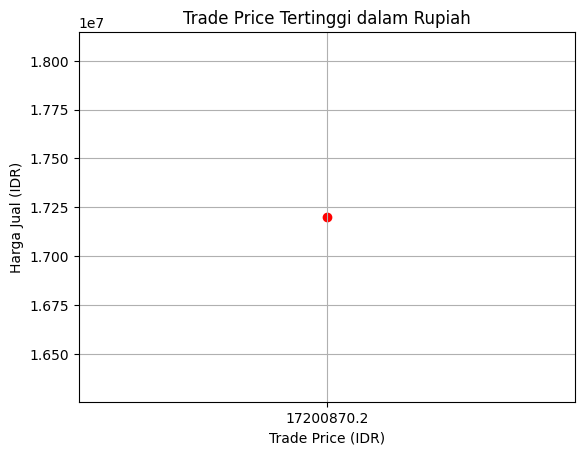

C:\Users\ACER\AppData\Local\Temp\ipykernel_13424\872603680.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_transactions['trade_date'] = pd.to_datetime(tsla_transactions['trade_date'])  # Ubah kolom tanggal ke format datetime


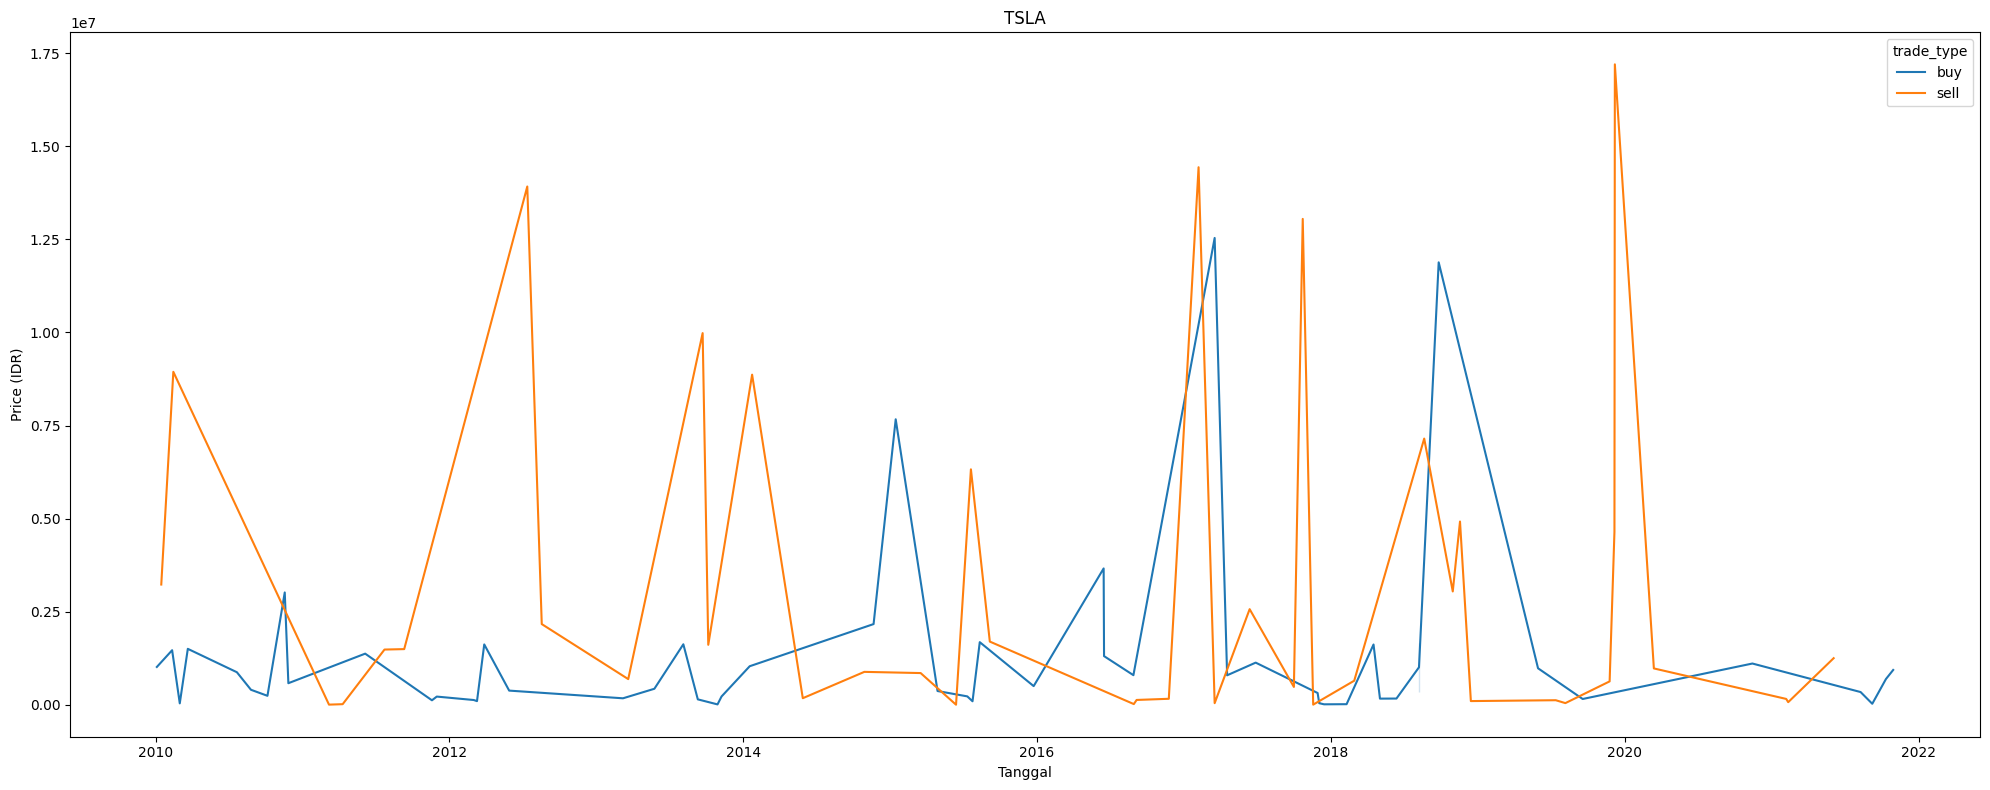

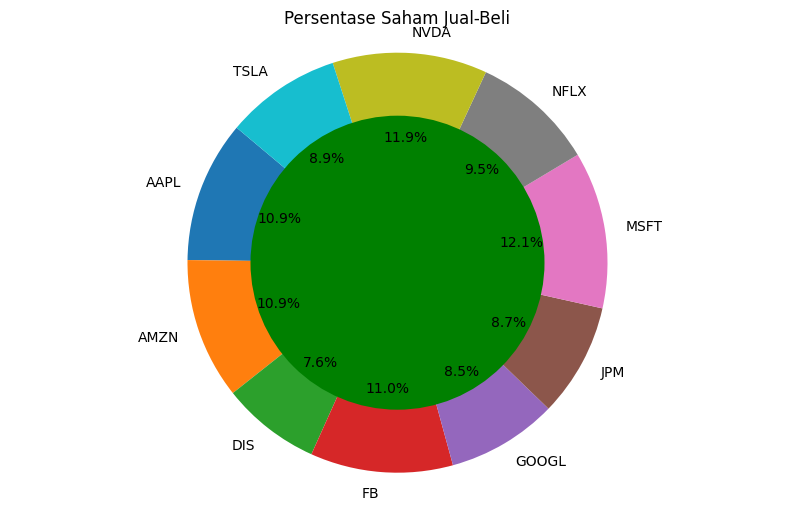

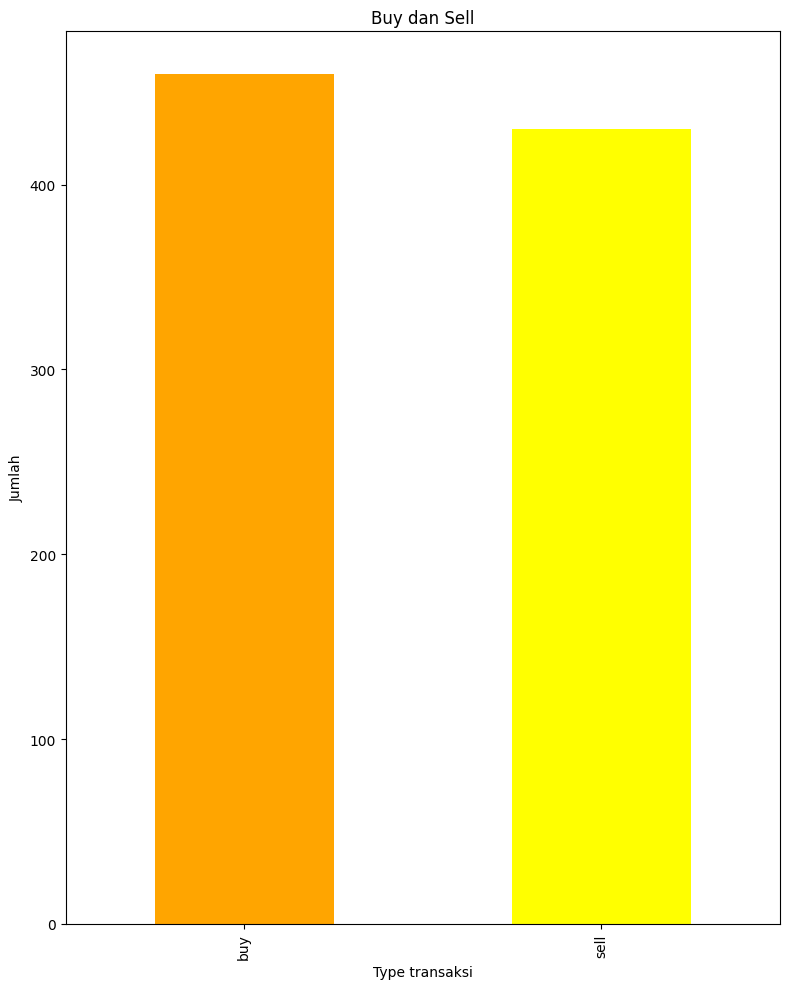

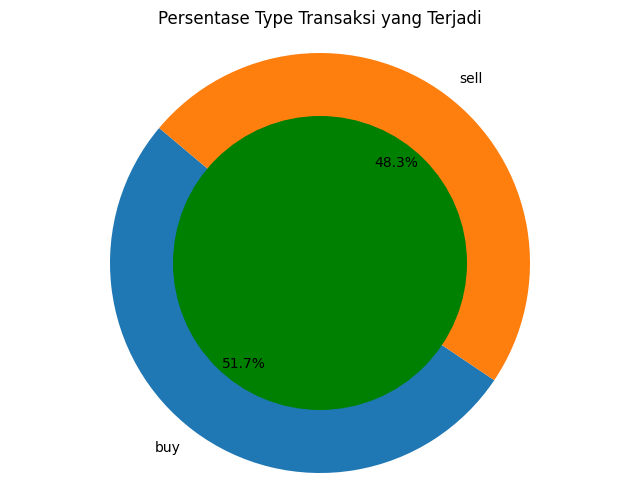

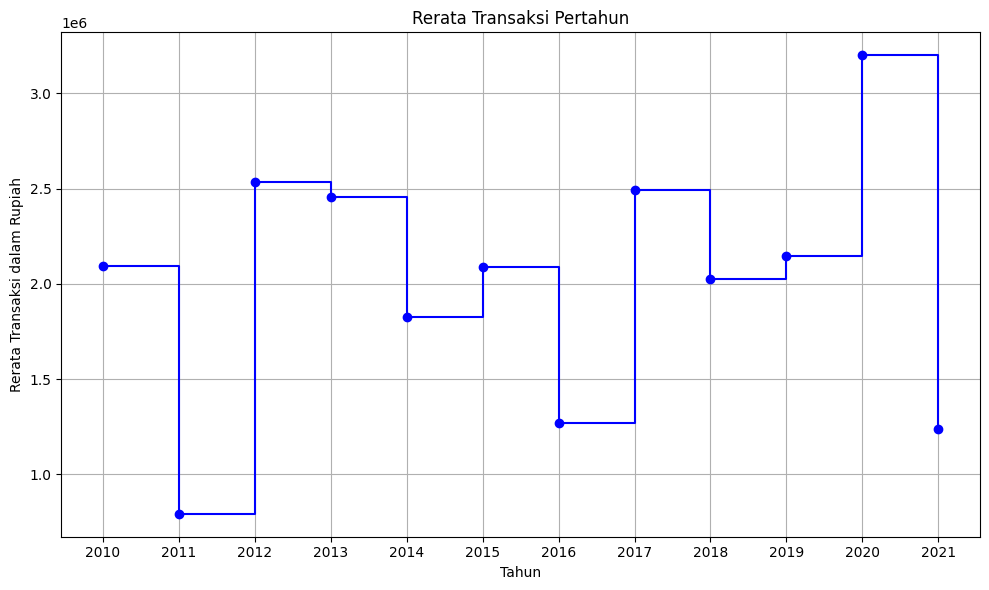

In [15]:
# Mengambil harga jual saham tertinggi dalam IDR
highest_sell_price_idr = df[df['currency'] == 'IDR']['trade_price_idr'].max()

# Visualisasi menggunakan scatter plot
plt.scatter('Harga Jual Tertinggi (IDR)', highest_sell_price_idr, color='red', marker='o')
plt.xticks([0], [highest_sell_price_idr])
plt.xlabel('Trade Price (IDR)')
plt.ylabel('Harga Jual (IDR)')
plt.grid(True)
plt.title('Trade Price Tertinggi dalam Rupiah')
plt.show()

# Mengambil transaksi pembelian saham TSLA
tsla_transactions = df[df['stock_symbol'] == 'TSLA']
tsla_transactions['trade_date'] = pd.to_datetime(tsla_transactions['trade_date'])  # Ubah kolom tanggal ke format datetime
tsla_transactions = tsla_transactions.sort_values(by='trade_date', ascending=True)

# Visualisasi menggunakan area plot
plt.figure(figsize=(20, 8))
sns.lineplot(x='trade_date', y='trade_price_idr', data=tsla_transactions, hue='trade_type')
plt.title('TSLA')
plt.xlabel('Tanggal')
plt.ylabel('Price (IDR)')
plt.tight_layout()
plt.show()

# Menghitung jumlah transaksi untuk setiap jenis saham
stock_type_counts = df.groupby(['stock_symbol', 'trade_type']).size().unstack(fill_value=0)

# Menghitung total transaksi untuk setiap jenis saham
stock_type_counts['total'] = stock_type_counts.sum(axis=1)

# Menghitung persentase transaksi jual dan beli untuk setiap jenis saham
stock_type_counts['sell_percentage'] = stock_type_counts['sell'] / stock_type_counts['total'] * 100
stock_type_counts['buy_percentage'] = stock_type_counts['buy'] / stock_type_counts['total'] * 100

# Visualisasi menggunakan doughnut plot
plt.figure(figsize=(10, 6))
plt.pie(stock_type_counts['sell_percentage'], labels=stock_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Saham Jual-Beli')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='green'))
plt.axis('equal')
plt.show()

# Menghitung jumlah transaksi buy dan sell
transaction_counts = df['trade_type'].value_counts()

# Visualisasi menggunakan stacked bar plot
plt.figure(figsize=(8, 10))
transaction_counts.plot(kind='bar', stacked=True, color=['orange', 'yellow'])
plt.title('Buy dan Sell')
plt.xlabel('Type transaksi')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# Menghitung persentase dari jumlah transaksi
transaction_percentages = transaction_counts / transaction_counts.sum() * 100

# Visualisasi menggunakan donut plot
plt.figure(figsize=(8, 6))
plt.pie(transaction_percentages, labels=transaction_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Type Transaksi yang Terjadi')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='green'))
plt.axis('equal')
plt.show()

df['trade_date'] = pd.to_datetime(df['trade_date'])

# Mengambil data transaksi jual saja
sell_transactions = df[df['trade_type'] == 'sell']

# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata nilai transaksi jual
sell_transactions_by_year = sell_transactions.groupby(sell_transactions['trade_date'].dt.year)['trade_price_idr'].mean()

# Visualisasi menggunakan step plot
plt.figure(figsize=(10, 6))
sell_transactions_by_year.plot(drawstyle='steps-post', marker='o', linestyle='-', color='b')
plt.title('Rerata Transaksi Pertahun')
plt.xlabel('Tahun')
plt.ylabel('Rerata Transaksi dalam Rupiah')
plt.grid(True)
plt.xticks(sell_transactions_by_year.index)
plt.tight_layout()
plt.show()